In [41]:
try:
    %pip install roboticstoolbox-python>=1.0.2
    
except:
    from IPython.core.display import HTML
    import pathlib
    styles_path = pathlib.Path(pathlib.Path().absolute(), "style", "style.css")
    styles = open(styles_path, "r").read()
    HTML(f"<style>{styles}</style>")

Note: you may need to restart the kernel to use updated packages.


# 1.0 Robotic Auscultation

$\large{\text{Robotic Auscultation}} \\ \large{\text{Automated Heart and Lung Auscultation in Robotic Physical Examinations}}$

$\text{By Leni Herzegovina}$ <br>
$\text{with Contributions of A. Shahidi}$

<br>

The sections of the Tutorial paper related to this notebook are listed next to each contents entry.
It is beneficial to read these sections of the paper before attempting the notebook Section.

### Contents

[1.1 The Elementary Transform Sequence](#ets)
* Introduction
* Forward Kinematics

[1.2 Forward Kinematics](#fk)
* Forward Kinematics


In [2]:
import numpy as np
import roboticstoolbox as rtb
import spatialmath as sm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

<br>

<a id='ets'></a>
### 1.1 Introduction
---

The goal of our system is to record high-quality sounds that a human doctor will listen to, so the robot’s aim is to provide sounds of diagnostic utility rather than to perform diagnosis itself. First, our system captures a 3D point cloud scan of the patient, registers a human body model, estimates the locations of key anatomical landmarks, and produces a prior map of high-quality auscultation locations. It then adopts informative path planning using audial feedback to adaptively search over the region of interest for a high-quality auscultation location. Audial feedback relies on sound quality estimators trained on a database of heart and lung stethoscope recordings. To determine the optimal sensing location we formulate a Bayesian Optimization (BO) problem where the unknown sound quality field is estimated as a semi-parametric residual Gaussian Process (SPAR-GP) model, with a prior map that depends on latent translation offset and sound quality scaling parameters.

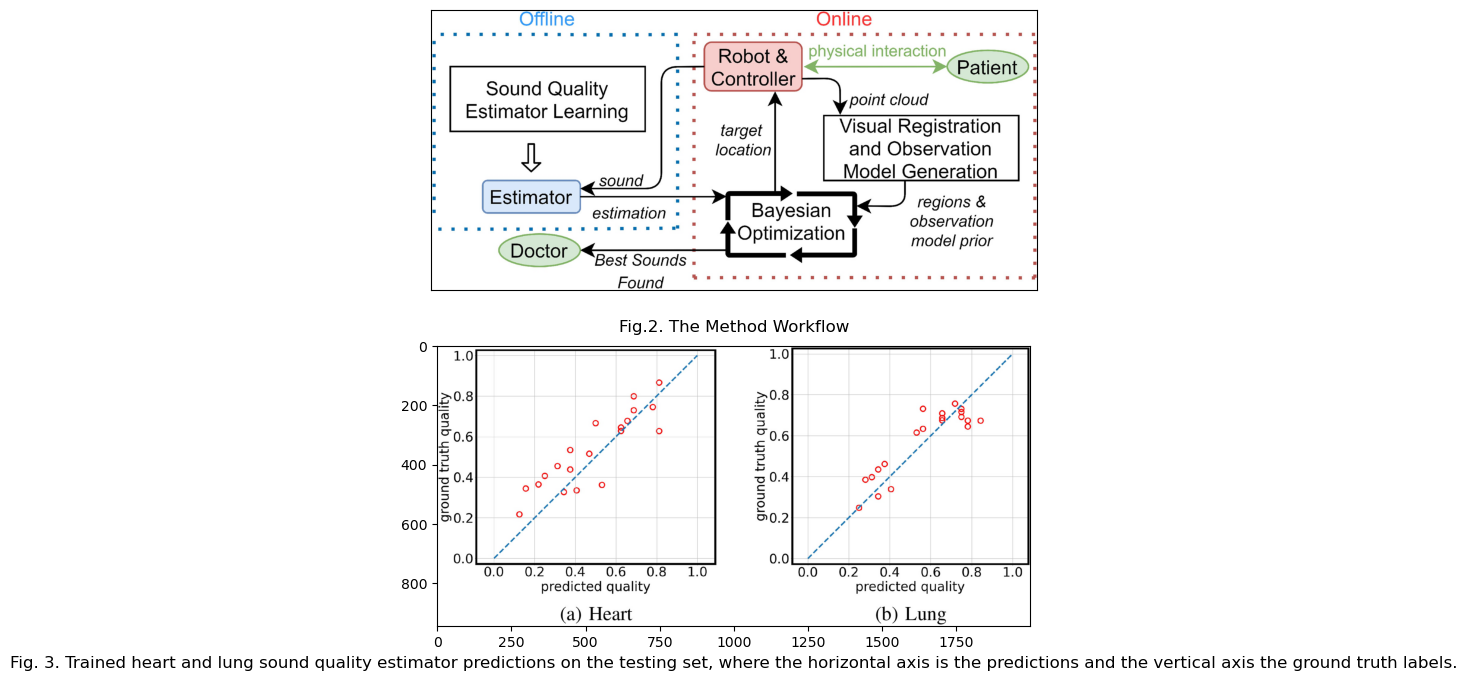

In [42]:
rcParams['figure.figsize'] = 11, 8

img_A = mpimg.imread('img/1.jpg')
img_B = mpimg.imread('img/2.jpg')

fig, ax = plt.subplots(2, 1, figsize=(11, 8))

ax[0].imshow(img_A)
ax[1].imshow(img_B)

caption_A = 'Fig.2. The Method Workflow'
caption_B = 'Fig. 3. Trained heart and lung sound quality estimator predictions on the testing set, where the horizontal axis is the predictions and the vertical axis the ground truth labels.'

ax[0].text(0.5, -0.15, caption_A, size=12, ha='center', transform=ax[0].transAxes)
ax[1].text(0.5, -0.15, caption_B, size=12, ha='center', transform=ax[1].transAxes)

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].label_outer()

plt.show()

<br>

<a id='fk'></a>
### 1.2 Robotic Remote Auscultation and Sonography
---

Tele-nursing robots consisting of a mobile base and arms have demonstrated a variety of nursing tasks including handovers, vital signs monitoring, disinfection, and auscultation Robotic technologies employed in the fight against COVID-19 and infectious diseases are reviewed in recent surveys Giuliani et al. develop a robot and tele-operation user interface for echocardiography. Several works have studied performing robot remote lung sonography using the MGIUS-R3 robotic tele-echography system produced by MGI Tech Co, Ltd. Marthur et al. develop a semi-autonomous robotic system to perform trauma assessment remotely,where the locations on a patient to be assessed are identified automatically via perception and sonography is performed with tele-operation. Instead of tele-operation, our proposed method performs auscultation fully automatically, which has the potential to reduce physician learning curve, cognitive load, and tedium. On a level of autonomy (LoA) scale from 0 (FullManual) to 5 (Full Autonomy) our system achieves a level of 4 (High-level Autonomy) because the robot autonomously performs the procedure while an operator monitors and intervenes when necessary.

<br>

<a id='fk'></a>
### 1.3 Informative Path Planning
---

<br>

<a id='fk'></a>
### 2.0 Method
---

<br>

<a id='fk'></a>
### 2.1 BO Formulation
---

We use BO to search adaptively for an auscultation location that yields a high quality sound within a specified anatomical region. We denote sound quality estimators for heart and lung sounds as $e_s(r)$, where $s$ is an anatomical structure (heart or lung) and $r$ is a stethoscope recording. The BO approach computes a probabilistic estimate of the unknown field $e_s(r(x))$ across the patient surface using a SPAR-GP model, which is a sum of the observation prior and the GP. An acquisition function is optimized to yield the new auscultation location. Given a new observation, the estimate is re-fit to the data and the process repeats until a termination criterion is met.

$f(x) ∼ GP(m(x), k(x, x ' ))$

For each anatomical location, the observation model is a sum of a parametric prior mean function $μ_θ(x)$ and a GP residual function: 

$f_s(x): e_s(r(x)) ≈ μ_θ(x) + f_s(x)$

Since the GP models residuals with respect to the prior, we subtract the prior from the sound quality as the GP observations: $yi = e_s(r(xi)) − μ_θ(xi)$. Here we further denote the history of the estimated sound qualities as $e = [e_1, . . . , e_n]$. Although the anatomical reference provides sound quality peaks assuming an average human and perfect registration of anatomical landmarks, the robot’s prior should capture the uncertainty in visual registration error and the effect a patient’s body type has on the magnitude of the overall sound quality. Therefore, we make the prior $μ_θ$ a parametric function of the latent variables $θ$ representing the translation offset and sound quality scaling, and infer $θ$ from observed sound qualities. In particular, a reference quality map $μ_0(x)$ is first generated from visual registration and $θ$ is initialized to $θ_0$, which includes zero translation offset and scaling of 1. The exact composition of the prior mean function is deferred.

$θ$ is inferred after each reading using the history $¯x$ and $¯e$ with maximum a posteriori (MAP) estimation.We use a likelihood function $L(θ|¯x, ¯e) = g(e_i|μ_θ(x_i), σ_2)$, where $g(·|μ_θ(x_i), σ_2)$ is the probability density function of the Gaussian distribution $N(μ_θ(x_i), σ2)$. The prior of $θ$, $h(θ)$, follows a multivariate Gaussian distribution $N(θ_o, Σ)$. We solve the MAP estimation problem by maximizing the posterior, using a standard numerical optimization solver:

$θ^∗ =$ argmax  $L(θ|¯x, ¯e)h(θ)$

<br>

<a id='fk'></a>
### 2.2 Sound Quality Estimator
---

<br>

<a id='fk'></a>
### 2.3 Visual Registration and Sound Quality Prior
---

<br>

<a id='fk'></a>
### 2.4 Motion Control
---

<br>

<a id='fk'></a>
### 3.0 Results
---

<br>

<a id='fk'></a>
### 3.1 Simulation Experiment
---

<br>

<a id='fk'></a>
### 3.2 Physical Auscultation Experiments
---